## Observations and Insights 

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


In [3]:
# Read from the file
revenue_df = pd.read_csv("../project1/Output_Files/revenue.csv")

revenue_df.head(50)


,Unnamed: 0,Title,Revenue,Box Office,Budget,Release Year,Release Month
0,0,Star Wars: The Force Awakens,2068223624,936662225,245000000,2015,12
1,1,Jurassic World,1671713208,652385625,150000000,2015,6
2,2,Furious 7,1515047671,353007020,190000000,2015,4
3,3,Avengers: Age of Ultron,1405403694,459005868,250000000,2015,4
4,4,Minions,1156730962,336045770,74000000,2015,6
5,5,Spectre,880674609,200074609,245000000,2015,10
6,6,Inside Out,857611174,356921711,175000000,2015,6
7,7,Mission: Impossible - Rogue Nation,682330139,195042377,150000000,2015,7
8,8,The Hunger Games: Mockingjay - Part 2,653428261,281723902,160000000,2015,11
9,9,The Martian,630161890,228433663,108000000,2015,9


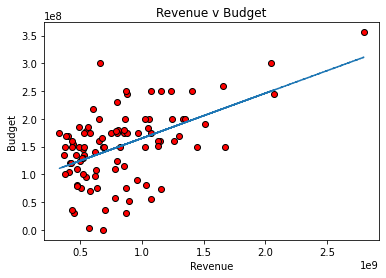

In [100]:
# Plot the revenue vs budget
revenue = revenue_df['Revenue']
budget = revenue_df['Budget']

plt.scatter(revenue, budget, marker="o", facecolors="red", edgecolors="black")
m_slope, m_int, m_r, m_p, m_std_err = st.linregress(revenue, budget)
m_fit = m_slope * revenue + m_int
plt.plot(revenue,m_fit,"--")

plt.title("Revenue v Budget")
plt.xlabel("Revenue")
plt.ylabel("Budget")
plt.show()

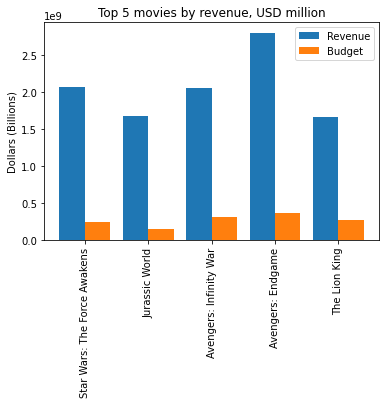

In [129]:
# Break up the budget into different bins by revenue
bin1_revenue = revenue_df.loc[(revenue_df["Revenue"] >= 0) & (revenue_df["Revenue"] <= 1000000000)]
bin2_revenue = revenue_df.loc[(revenue_df["Revenue"] > 1000000000) & (revenue_df["Revenue"] <= 1500000000)]
bin3_revenue = revenue_df.loc[(revenue_df["Revenue"] > 1550000000) & (revenue_df["Revenue"] <= 3000000000)]
bin4_revenue = revenue_df.loc[(revenue_df["Revenue"] > 2000000000) & (revenue_df["Revenue"] <= 2500000000)]
bin5_revenue = revenue_df.loc[(revenue_df["Revenue"] > 2500000000) & (revenue_df["Revenue"] <= 3000000000)]
#bin1 = revenue_df.loc[(revenue_df["Revenue"] == 1056057273)]
bin3_revenue.head()

# I was able to retrieve the top 5 films by revenue
X = bin3_revenue['Title']
X_axis = np.arange(len(X))
revenue_bar = bin3_revenue['Revenue']
revenue_bar_label = 'Revenue, USD million'
revenue_bar_color = '#32628d'  #blue

budget_bar = bin3_revenue['Budget']
budget_bar_label = 'Budget, USD million'
budget_bar_color = '#cde01d'

width = 0.1
plot_title = 'Top 5 movies by revenue, USD billion'
filename = 'top5-revenue-plot'

#fig, ax = plt.subplots(figsize=(10,6), facecolor=(.94, .94, .94))
#plt.tight_layout()

#ax.barh(5, revenue_bar, width, label=revenue_bar_label, color=revenue_bar_color)
#ax.barh(5, budget_bar, width, label=budget_bar_label, color=budget_bar_color)

plt.bar(X_axis - 0.2, revenue_bar, 0.4,label='Revenue')
plt.bar(X_axis + 0.2, budget_bar,0.4,label='Budget')
plt.xticks(X_axis, X,rotation=90)
plt.legend()
plt.title("Top 5 movies by revenue, USD million")
plt.ylabel("Dollars (Billions)")

plt.savefig('top5_revenue.png', dpi=300, bbox_inches='tight')
plt.show()




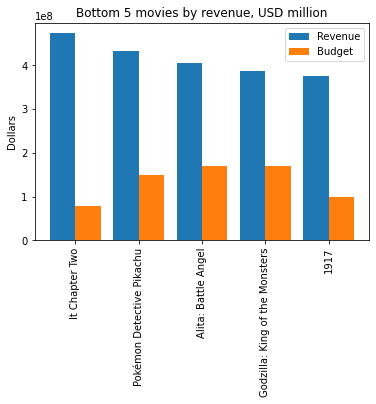

In [101]:
# See the top 5 lowest revenue films
revenue_df.sort_values('Revenue', ascending = False)
bottom_revenue = revenue_df.tail(5)
bottom_revenue

# I was able to retrieve the bottom 5 films by revenue
X_bottom = bottom_revenue['Title']
X_axis_bottom = np.arange(len(X_bottom))
revenue_bar_bottom = bottom_revenue['Revenue']
#revenue_bar_label = 'Revenue, USD million'
revenue_bar_color = '#32628d'  #blue

budget_bar_bottom = bottom_revenue['Budget']
budget_bar_label = 'Budget, USD million'
budget_bar_color = '#cde01d'

width = 0.1
plot_title = 'Bottom 5 movies by revenue, USD billion'
filename = 'bottom5-revenue-plot'

#fig, ax = plt.subplots(figsize=(10,6), facecolor=(.94, .94, .94))
#plt.tight_layout()

#ax.barh(5, revenue_bar, width, label=revenue_bar_label, color=revenue_bar_color)
#ax.barh(5, budget_bar, width, label=budget_bar_label, color=budget_bar_color)

plt.bar(X_axis_bottom - 0.2, revenue_bar_bottom, 0.4,label='Revenue')
plt.bar(X_axis_bottom + 0.2, budget_bar_bottom,0.4,label='Budget')
plt.xticks(X_axis_bottom, X_bottom,rotation=90)
#plt.ticklabel_format(useOffset=False)
plt.legend()
plt.title("Bottom 5 movies by revenue, USD million")
plt.ylabel("Dollars")

plt.show()

#revenue_film = revenue_df.loc[(revenue_df['Title'] == "Furious 7")]['Revenue']
#print(revenue_film)


Release Year
2015    20
2016    19
2017    20
2018    19
2019    18
Name: Title, dtype: int64


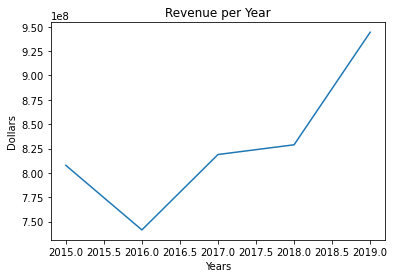

In [128]:
#
revenue_year = revenue_df['Release Year'].unique()
revenue_year_amt = revenue_df.groupby(["Release Year"]).mean()["Revenue"]
revenue_count_year = revenue_df.groupby(["Release Year"]).count()["Title"]
print(revenue_count_year)

revenue_year_summary = pd.DataFrame({"Year": revenue_year,
                                     "Revenue": revenue_year_amt})
#revenue_year_summary['Revenue'].round(10)
pd.options.display.float_format = '{:.2f}'.format
#revenue_year_summary['Revenue'].round(5)
revenue_year_summary

plt.plot(revenue_year_summary['Year'],revenue_year_summary['Revenue'])
plt.title("Revenue per Year")
plt.ylabel("Dollars")
plt.xlabel("Year")
plt.show()